# Post-Rebalancing Stock Returns Analysis

This section studies the impact of index rebalancing on the returns on the affected stocks.<br>
<br>
In this study, we focus on the following period:
- Ex-ante days: {1, 3, 5} days prior to the index rebalancing (ex-date)
- Ex-post days: {3, 5, 10, 20} days after the ex-date.

Our sample consists of observations from Jun 2022 - Jun 2023, encompassing stocks that are included/ excluded from the FTSE100 and FTSE250 index universe. There should be in total 65 instances of inclusions and exclusions in the FTSE large-mid cap universe over the 1 year period.

In [1]:
# Import important libraries

# Basic computation packages
import numpy as np
import pandas as pd

# Plot packages
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical package
from scipy import stats

# Format precision
np.set_printoptions(precision = 3)

# Import and Wrangle data

In [2]:
# Import data
df = pd.read_csv('../output/ETL_ftse_price_data.csv')
df.head()

,Name,SEDOL,ISIN,FTSE100,FTSE250,post_date,pre_five_pd,pre_three_pd,pre_one_pd,post_three_pd,...,diff_five_ten,diff_five_twenty,diff_three_three,diff_three_five,diff_three_ten,diff_three_twenty,diff_one_three,diff_one_five,diff_one_ten,diff_one_twenty
0,ASOS PLC,3092725,GB0030927254,NaN,1.0,2022-06-20,12.0900,11.600000,8.8350,8.875000,...,-3.180002,-1.940002,-2.725000,-2.835000,-2.690002,-1.450002,0.040000,-0.070000,0.074998,1.314998
1,Bank of Georgia Group PLC,BF4HYT8,GB00BF4HYT85,NaN,1.0,2022-06-20,15.3000,15.039998,14.7600,14.319998,...,-1.800000,-1.180002,-0.720000,-0.519998,-1.539998,-0.920000,-0.440002,-0.240000,-1.260000,-0.640002
2,Centrica PLC,B033F22,GB00B033F229,1.0,-1.0,2022-06-20,0.7798,0.789400,0.7744,0.828600,...,0.038600,0.106200,0.039200,0.032600,0.029000,0.096600,0.054200,0.047600,0.044000,0.111600
3,International Distributions Services PLC,BDVZYZ7,GB00BDVZYZ77,-1.0,1.0,2022-06-20,2.7320,2.819998,2.7200,2.785999,...,-0.054002,0.038999,-0.033999,-0.010998,-0.141999,-0.048999,0.065999,0.088999,-0.042002,0.050999
4,ITV PLC,3398649,GB0033986497,-1.0,1.0,2022-06-20,0.6738,0.700200,0.6540,0.672000,...,-0.019800,-0.015800,-0.028200,-0.022600,-0.046200,-0.042200,0.018000,0.023600,0.000000,0.004000


In [3]:
print(f'There are a total of {df.shape[0]} instances in our investigation period that are impacted by index rebalancing fo the FTSE100 and FTSE250 indices.')

There are a total of 65 instances in our investigation period that are impacted by index rebalancing fo the FTSE100 and FTSE250 indices.


In [4]:
df['Group'] =\
    list(
        zip(df['FTSE100'], 
            df['FTSE250']
        )
    )

groups = df['Group'].unique()

df['Group'] =\
    df['Group']\
    .map({
            groups[0] : 'new_FTSE250',
            groups[1] : 'FTSE250_FTSE100',
            groups[2] : 'FTSE100_FTSE250',
            groups[3] : 'drop_FTSE250'
        })

df.head()

,Name,SEDOL,ISIN,FTSE100,FTSE250,post_date,pre_five_pd,pre_three_pd,pre_one_pd,post_three_pd,...,diff_five_twenty,diff_three_three,diff_three_five,diff_three_ten,diff_three_twenty,diff_one_three,diff_one_five,diff_one_ten,diff_one_twenty,Group
0,ASOS PLC,3092725,GB0030927254,NaN,1.0,2022-06-20,12.0900,11.600000,8.8350,8.875000,...,-1.940002,-2.725000,-2.835000,-2.690002,-1.450002,0.040000,-0.070000,0.074998,1.314998,new_FTSE250
1,Bank of Georgia Group PLC,BF4HYT8,GB00BF4HYT85,NaN,1.0,2022-06-20,15.3000,15.039998,14.7600,14.319998,...,-1.180002,-0.720000,-0.519998,-1.539998,-0.920000,-0.440002,-0.240000,-1.260000,-0.640002,new_FTSE250
2,Centrica PLC,B033F22,GB00B033F229,1.0,-1.0,2022-06-20,0.7798,0.789400,0.7744,0.828600,...,0.106200,0.039200,0.032600,0.029000,0.096600,0.054200,0.047600,0.044000,0.111600,FTSE250_FTSE100
3,International Distributions Services PLC,BDVZYZ7,GB00BDVZYZ77,-1.0,1.0,2022-06-20,2.7320,2.819998,2.7200,2.785999,...,0.038999,-0.033999,-0.010998,-0.141999,-0.048999,0.065999,0.088999,-0.042002,0.050999,FTSE100_FTSE250
4,ITV PLC,3398649,GB0033986497,-1.0,1.0,2022-06-20,0.6738,0.700200,0.6540,0.672000,...,-0.015800,-0.028200,-0.022600,-0.046200,-0.042200,0.018000,0.023600,0.000000,0.004000,FTSE100_FTSE250


In [5]:
# Remove redundant columns
df =\
    df\
    .drop(
        [
            'SEDOL',
            'ISIN',
            'FTSE100',
            'FTSE250'
        ],
    axis = 1)

## Calculate required returns for analysis


In [6]:
# set up required lists for iteration
days_bef_ex_ante = ['five', 'three', 'one'] # before event
days_aft_ex_post = ['three', 'five', 'ten', 'twenty'] # after event

for pre_day in days_bef_ex_ante:
    for post_day in days_aft_ex_post:
        # Calculate ex-ante-ex-post return
        df[f'ret_{pre_day}_{post_day}'] =\
        (
            df[f'diff_{pre_day}_{post_day}']
            / df[f'pre_{pre_day}_pd']
        )

# Extract returns as a standalone df
df_rets =\
    df.drop(
        df.columns[1:-13],
        axis = 1
    ).copy()

In [7]:
df_rets.head()

,Name,Group,ret_five_three,ret_five_five,ret_five_ten,ret_five_twenty,ret_three_three,ret_three_five,ret_three_ten,ret_three_twenty,ret_one_three,ret_one_five,ret_one_ten,ret_one_twenty
0,ASOS PLC,new_FTSE250,-0.265922,-0.275021,-0.263027,-0.160463,-0.234914,-0.244397,-0.231897,-0.125000,0.004527,-0.007923,0.008489,0.148840
1,Bank of Georgia Group PLC,new_FTSE250,-0.064052,-0.050980,-0.117647,-0.077124,-0.047872,-0.034574,-0.102393,-0.061170,-0.029810,-0.016260,-0.085366,-0.043361
2,Centrica PLC,FTSE250_FTSE100,0.062580,0.054116,0.049500,0.136189,0.049658,0.041297,0.036737,0.122371,0.069990,0.061467,0.056818,0.144112
3,International Distributions Services PLC,FTSE100_FTSE250,0.019765,0.028184,-0.019766,0.014275,-0.012056,-0.003900,-0.050354,-0.017376,0.024264,0.032720,-0.015442,0.018749
4,ITV PLC,FTSE100_FTSE250,-0.002671,0.005640,-0.029386,-0.023449,-0.040274,-0.032276,-0.065981,-0.060269,0.027523,0.036086,0.000000,0.006116


# Exploratory Data Analysis

## Summary Statistics - Overall

We shall run a summary on the returns of the entire sample of 65 instances. 

In [8]:
df_rets.describe()

,ret_five_three,ret_five_five,ret_five_ten,ret_five_twenty,ret_three_three,ret_three_five,ret_three_ten,ret_three_twenty,ret_one_three,ret_one_five,ret_one_ten,ret_one_twenty
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,-0.029272,-0.043437,-0.034809,-0.026523,-0.023865,-0.038687,-0.029500,-0.021003,-0.008156,-0.022942,-0.013496,-0.002772
std,0.095360,0.109873,0.097117,0.114581,0.085667,0.096639,0.087712,0.108667,0.065059,0.083646,0.074722,0.119232
min,-0.265922,-0.322293,-0.263027,-0.268790,-0.234914,-0.290667,-0.231897,-0.234667,-0.169355,-0.261111,-0.140625,-0.212653
25%,-0.091314,-0.126939,-0.087913,-0.090253,-0.071515,-0.104848,-0.081989,-0.076319,-0.038062,-0.069731,-0.060625,-0.072000
50%,-0.029085,-0.042207,-0.039077,-0.020358,-0.033384,-0.047138,-0.040284,-0.020000,-0.013303,-0.009972,-0.007246,-0.018484
75%,0.006578,0.013563,0.011494,0.020235,-0.003448,-0.000805,0.002897,0.016336,0.010040,0.014057,0.023490,0.072386
max,0.272616,0.292308,0.266666,0.349321,0.246037,0.252295,0.266666,0.342880,0.223153,0.252295,0.266666,0.329134


## Summary Statistics - by different ex-ante/ex-post combination

We may also want to run a more granular summary stats based on the different index movement, i.e.
- Exclusion from FTSE100 -> Inclusion into FTSE250 `FTSE100_FTSE250`
- Exclusion from FTSE250 -> Inclusion into FTSE100 `FTSE250_FTSE100`
- Exclusion from FTSE250 `drop_FTSE250`
- Inclusion into FTSE250 `new_FTSE250`

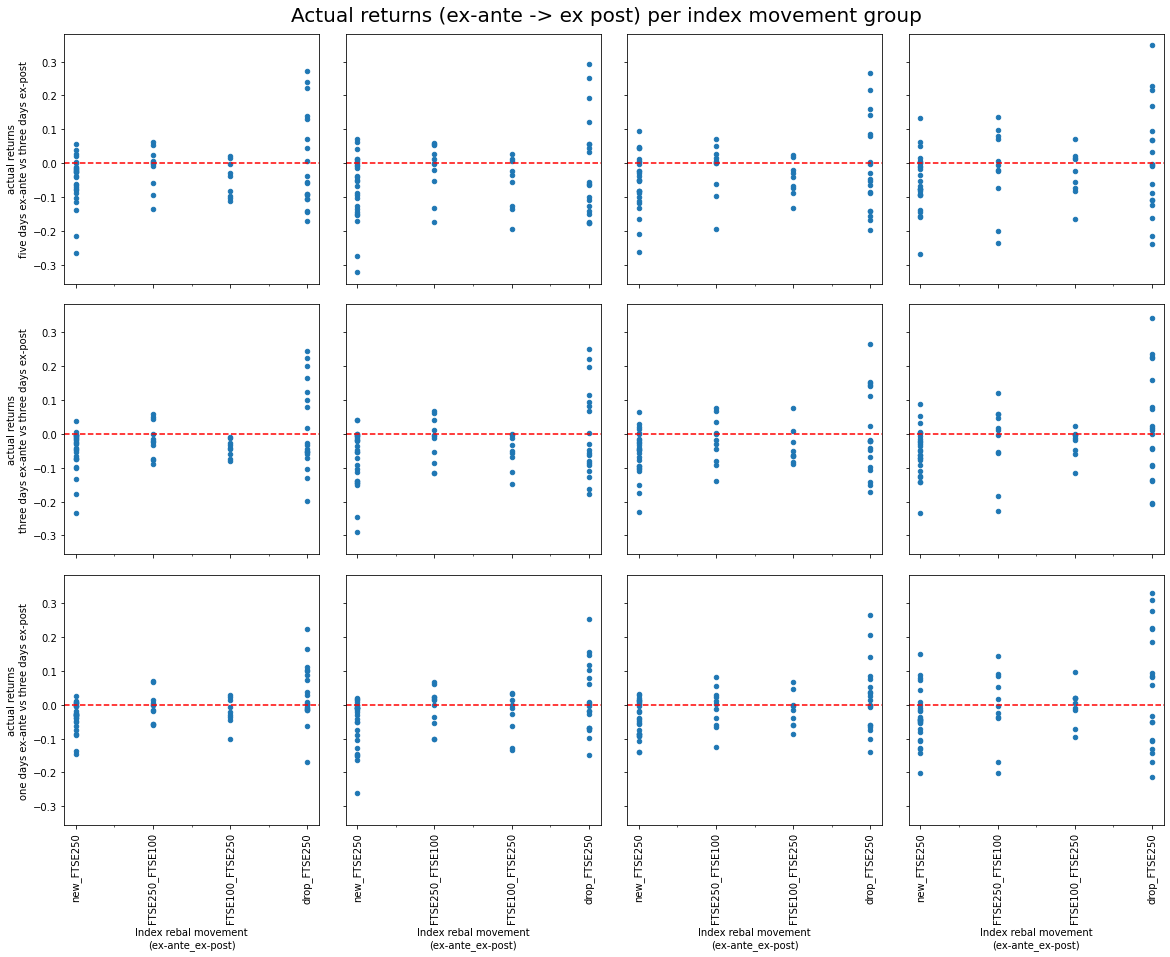

In [21]:
fig, axs =\
    plt.subplots(3, 4, 
                 figsize = (16,12),
                sharex = True,
                sharey = True)

fig.suptitle('Actual returns (ex-ante -> ex post) per index movement group', fontsize = 20)
fig.tight_layout()

for i, pre_day in enumerate(days_bef_ex_ante):
    for j, post_day in enumerate(days_aft_ex_post):
        df_rets.plot.scatter(
            x = 'Group',
            y = f'ret_{pre_day}_{post_day}',
            ax = axs[i,j])
        
        axs[i, j].axhline(c = 'r', ls = '--')
        
        axs[i, j].set_ylabel(f'actual returns\n{pre_day} days ex-ante vs {post_day} days ex-post')
        
        axs[i, j].set_xlabel('Index rebal movement\n(ex-ante_ex-post)')
        axs[i,j].tick_params('x', labelrotation=90)
plt.show()

In [26]:
summary_rets =\
    df_rets\
        .groupby(
            by = 'Group'
        ).describe()\
        .T

In [36]:
def print_summary_stats_pretty(df):
    for group in df.index.to_frame()[0].unique():
        print(f'Printing Summary stats for {group}...')
        sub_df = df.loc[group, :]
        print(sub_df)
        print('\n------------------------------------------------')

In [37]:
print_summary_stats_pretty(summary_rets)

Printing Summary stats for ret_five_three...
Group  FTSE100_FTSE250  FTSE250_FTSE100  drop_FTSE250  new_FTSE250
count         9.000000        11.000000     19.000000    26.000000
mean         -0.047994        -0.013149      0.001413    -0.052036
std           0.052104         0.059622      0.139830     0.073592
min          -0.112080        -0.134346     -0.171859    -0.265922
25%          -0.098217        -0.032508     -0.100416    -0.079255
50%          -0.039159         0.001233     -0.056471    -0.032876
75%          -0.002671         0.014358      0.100225    -0.012038
max           0.019765         0.062580      0.272616     0.057833

------------------------------------------------
Printing Summary stats for ret_five_five...
Group  FTSE100_FTSE250  FTSE250_FTSE100  drop_FTSE250  new_FTSE250
count         9.000000        11.000000     19.000000    26.000000
mean         -0.058495        -0.015542     -0.015004    -0.070803
std           0.077077         0.076405      0.146978    

In [48]:
# Print only the number of samples per index movement group
summary_rets.xs('count', level=1, drop_level=False).head(1)

,Group,FTSE100_FTSE250,FTSE250_FTSE100,drop_FTSE250,new_FTSE250
ret_five_three,count,9.0,11.0,19.0,26.0


# Hypothesis Tests

Now that we have done the exploratary data analysis, we shall apply hypothesis tests on to ascertain our hypothesis.<br>

Recall: Our hypothesis is that there is non-zero mean return on stocks that are impacted by the index rebalancing. We are unsure at this point the direction of this impact, as it is highly dependent on the ETF flows and AUM, which warrants further fundamental analyses. We want to test that our conjecture is in the right direction.<br>

Given that our sample size per group is less than 30, we shall run a one-sample t-test, with the following setup:
- `H0`: null hypothesis; mean return is zero
- `H1`: alternative hypothesis; mean return is non-zero

Here, we are running a two-tailed test, with a significance level of 5%.

In [16]:
t_test_res = []
for series in df_rets.columns[2:]:
    returns = np.array(df_rets[series])
    t_statistic, p_value = stats.ttest_1samp(returns, 0)
    
    t_test_res.append({
        'series': series,
        't-stats' : t_statistic,
        'p-value' : p_value,
        'conclusion' : 'reject Null' if p_value < 0.05 else 'do not reject Null'
    })
    
pd.DataFrame(t_test_res)

,series,t-stats,p-value,conclusion
0,ret_five_three,-2.474836,0.015990,reject Null
1,ret_five_five,-3.187294,0.002222,reject Null
2,ret_five_ten,-2.889667,0.005259,reject Null
3,ret_five_twenty,-1.866256,0.066589,do not reject Null
4,ret_three_three,-2.245985,0.028165,reject Null
5,ret_three_five,-3.227544,0.001970,reject Null
6,ret_three_ten,-2.711536,0.008590,reject Null
7,ret_three_twenty,-1.558254,0.124105,do not reject Null
8,ret_one_three,-1.010681,0.315975,do not reject Null
9,ret_one_five,-2.211280,0.030595,reject Null


In [17]:
t_test_granular_res = []


for series in df_rets.columns[2:]:
    for group in df_rets['Group'].unique():
        returns = np\
                    .array(df_rets
                           .loc[df_rets['Group'] == group,
                                series])
        mean_ret = returns.mean()
        t_statistic, p_value = stats.ttest_1samp(returns, 0)

        t_test_granular_res.append({
            'series': series,
            'group': group,
            'mean': mean_ret,
            't-stats' : t_statistic,
            'p-value' : p_value,
            'conclusion' : 'reject Null' if p_value < 0.05 else 'do not reject Null'
        })
    
df_t_test_granular = pd.DataFrame(t_test_granular_res)
df_t_test_granular

,series,group,mean,t-stats,p-value,conclusion
0,ret_five_three,new_FTSE250,-0.052036,-3.605480,0.001354,reject Null
1,ret_five_three,FTSE250_FTSE100,-0.013149,-0.731429,0.481305,do not reject Null
2,ret_five_three,FTSE100_FTSE250,-0.047994,-2.763372,0.024547,reject Null
3,ret_five_three,drop_FTSE250,0.001413,0.044040,0.965357,do not reject Null
4,ret_five_five,new_FTSE250,-0.070803,-3.744234,0.000953,reject Null
5,ret_five_five,FTSE250_FTSE100,-0.015542,-0.674657,0.515188,do not reject Null
6,ret_five_five,FTSE100_FTSE250,-0.058495,-2.276760,0.052335,do not reject Null
7,ret_five_five,drop_FTSE250,-0.015004,-0.444978,0.661641,do not reject Null
8,ret_five_ten,new_FTSE250,-0.055733,-3.459483,0.001954,reject Null
9,ret_five_ten,FTSE250_FTSE100,-0.016676,-0.734913,0.479273,do not reject Null


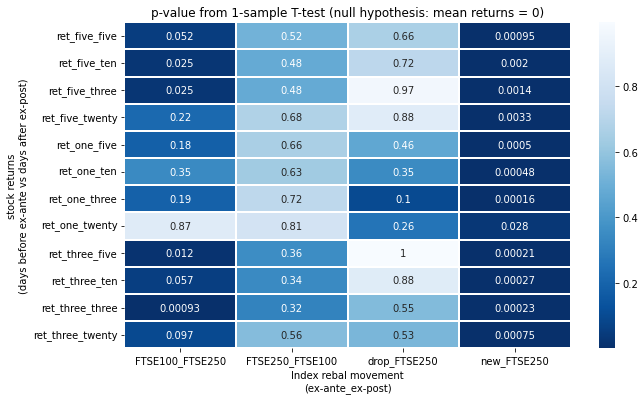

In [18]:
df_t_test_pivot = df_t_test_granular.pivot(index='series', columns='group', values='p-value')

plt.figure(figsize = (10,6))
plt.title('p-value from 1-sample T-test (null hypothesis: mean returns = 0)')
sns.heatmap(df_t_test_pivot, cmap = 'Blues_r',  linewidths = 0.30, annot = True)
plt.xlabel('Index rebal movement\n(ex-ante_ex-post)')
plt.ylabel('stock returns\n(days before ex-ante vs days after ex-post)')
plt.show()

From the heatmap, we see that there is statistically signifant non-zero mean return on new entrants into FTSE250 and dropouts of FTSE100 into 250. From the EDA, the mean return on this group is negative, meaning that we shall take short positions on these stocks.